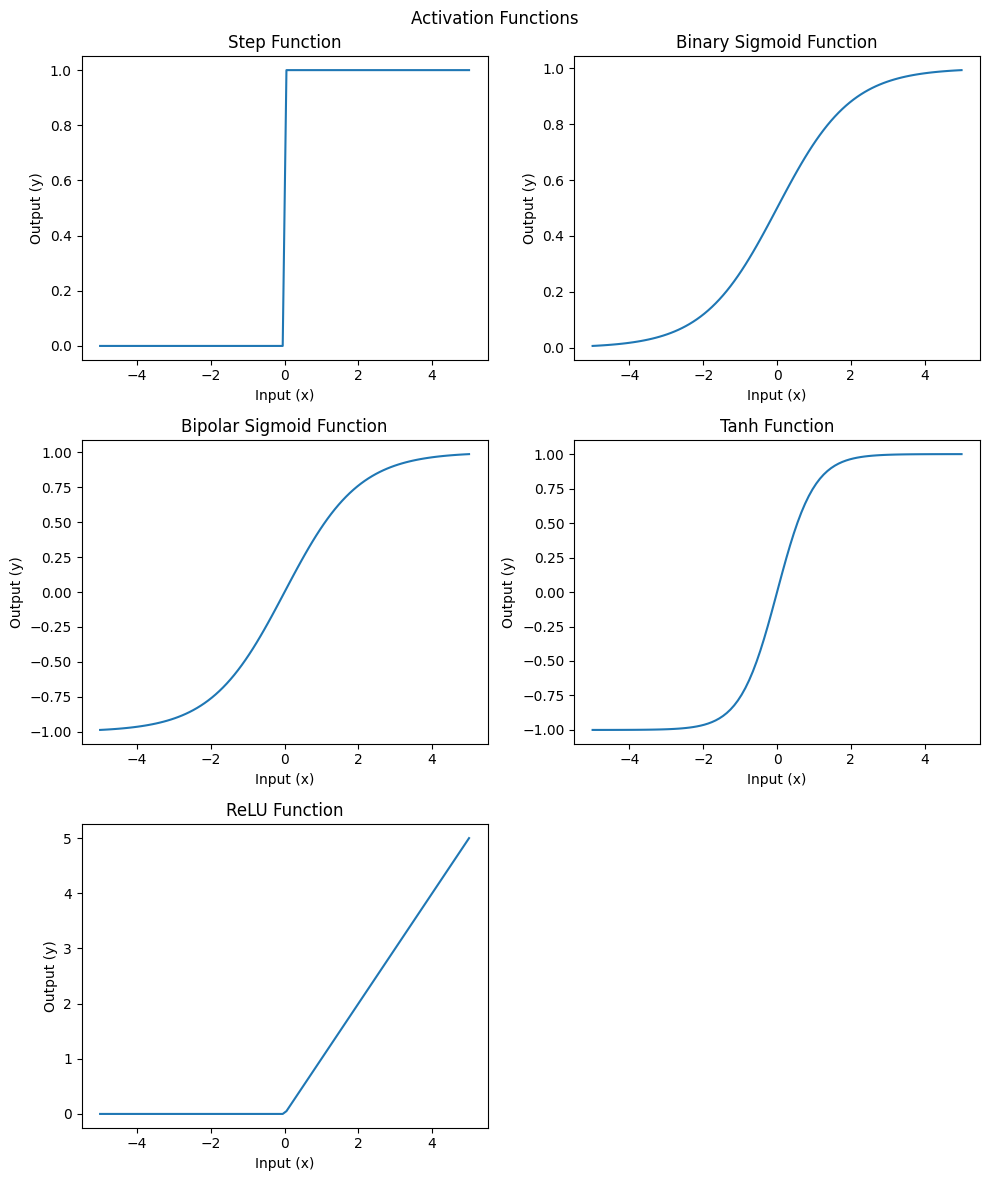

In [1]:

# 1. Implement and Visualize Activation Functions:
# o Implement the following activation functions in Python:
# ▪ Step Function
# ▪ Sigmoid Function (Binary and Bipolar)
# ▪ Tanh Function
# ▪ ReLU Function
# o Visualize each activation function using matplotlib/seaborn/bokeh to
# observe how they map input values to output values.

import numpy as np
import matplotlib.pyplot as plt


def step_function(x):
  """Step activation function."""
  return np.where(x >= 0, 1, 0)


def sigmoid_binary(x):
  """Binary Sigmoid activation function."""
  return 1 / (1 + np.exp(-x))


def sigmoid_bipolar(x):
  """Bipolar Sigmoid activation function."""
  return (2 / (1 + np.exp(-x))) - 1


def tanh_function(x):
  """Tanh activation function."""
  return np.tanh(x)


def relu_function(x):
  """ReLU activation function."""
  return np.maximum(0, x)


# Generate input values
x = np.linspace(-5, 5, 100)

# Calculate outputs for each activation function
y_step = step_function(x)
y_sigmoid_binary = sigmoid_binary(x)
y_sigmoid_bipolar = sigmoid_bipolar(x)
y_tanh = tanh_function(x)
y_relu = relu_function(x)

# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 12))
axs = axs.ravel()

# Plot each activation function
axs[0].plot(x, y_step)
axs[0].set_title('Step Function')

axs[1].plot(x, y_sigmoid_binary)
axs[1].set_title('Binary Sigmoid Function')

axs[2].plot(x, y_sigmoid_bipolar)
axs[2].set_title('Bipolar Sigmoid Function')

axs[3].plot(x, y_tanh)
axs[3].set_title('Tanh Function')

axs[4].plot(x, y_relu)
axs[4].set_title('ReLU Function')

# Remove the last subplot since we only have 5 activation functions
fig.delaxes(axs[5])


# Set common labels and title
for ax in axs[:5]:
  ax.set_xlabel('Input (x)')
  ax.set_ylabel('Output (y)')

fig.suptitle('Activation Functions')
plt.tight_layout()
plt.show()


In [ ]:


# The code provided already visualizes how the activation functions map input values to output values.
# The plots show the relationship between the input (x) and the output (y) for each function.
#
# For example, the step function shows that any input below 0 results in an output of 0, and any input at or above 0 results in an output of 1.
# The sigmoid function shows a smooth, S-shaped curve, mapping inputs to a range of 0 to 1 for the binary sigmoid and -1 to 1 for the bipolar sigmoid.
# The tanh function also shows an S-shaped curve but maps inputs to a range of -1 to 1.
# The ReLU function shows a linear relationship for positive inputs, with an output of 0 for negative inputs.
#
# By examining these plots, you can understand how each activation function behaves and how it affects the output of a neural network based on its input.

# If you want to further explore the relationship, you can try:
# - Changing the range of input values (x)
# - Zooming in on specific parts of the plots
# - Adding more data points for smoother curves
# - Comparing the plots of different activation functions side-by-side


In [ ]:

# Interpretation of Activation Functions

# 1. Step Function:
# - Output is binary (0 or 1).
# - It's a threshold-based function.
# - Useful for simple binary classification tasks.
# - Not differentiable, which can be a problem for gradient-based optimization in neural networks.


# 2. Binary Sigmoid Function:
# - Output is between 0 and 1.
# - Smooth, S-shaped curve.
# - Useful for binary classification problems where you want a probability-like output.
# - Differentiable, allowing for gradient-based training.


# 3. Bipolar Sigmoid Function:
# - Output is between -1 and 1.
# - Smooth, S-shaped curve similar to the binary sigmoid but centered around 0.
# - Useful when you want outputs that can represent both positive and negative values.
# - Differentiable.


# 4. Tanh Function (Hyperbolic Tangent):
# - Output is between -1 and 1.
# - Smooth, S-shaped curve.
# - Often preferred over the sigmoid function in hidden layers because it has zero-centered output.
# - Differentiable.


# 5. ReLU Function (Rectified Linear Unit):
# - Output is 0 for negative inputs and the input itself for positive inputs.
# - Non-linear function.
# - Very popular in deep learning due to its efficiency and ability to avoid vanishing gradient problems.
# - Differentiable almost everywhere (except at 0), but the derivative at 0 is undefined.

# In general, the choice of activation function depends on the specific task, network architecture, and desired properties of the output.
# For example, Sigmoid is often used in the output layer for binary classification, while ReLU is preferred in hidden layers of deep neural networks.



In [4]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, activation):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.activation = activation

        # Initialize weights and biases randomly
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_output = np.zeros((1, output_size))

    def forward(self, X):
        # Calculate hidden layer output
        self.hidden_layer_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_layer_output = self.activation(self.hidden_layer_input)

        # Calculate output layer output
        self.output_layer_input = np.dot(self.hidden_layer_output, self.weights_hidden_output) + self.bias_output
        self.output_layer_output = self.activation(self.output_layer_input)

        return self.output_layer_output



# Example usage:

# Input data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# Expected output (XOR problem)
y = np.array([[0], [1], [1], [0]])

# Create neural networks with different activation functions
def sigmoid(x):
  """Sigmoid activation function."""
  return 1 / (1 + np.exp(-x))

def tanh(x): # define the tanh function here so it is in scope
  """Tanh activation function."""
  return np.tanh(x)

def relu(x):
  """ReLU activation function."""
  return np.maximum(0, x)

nn_sigmoid = NeuralNetwork(2, 4, 1, sigmoid)
nn_tanh = NeuralNetwork(2, 4, 1, tanh)
nn_relu = NeuralNetwork(2, 4, 1, relu)


# Perform forward pass for each network
output_sigmoid = nn_sigmoid.forward(X)
output_tanh = nn_tanh.forward(X)
output_relu = nn_relu.forward(X)

print("Output with Sigmoid activation:", output_sigmoid)
print("Output with Tanh activation:", output_tanh)
print("Output with ReLU activation:", output_relu)

Output with Sigmoid activation: [[0.44137492]
 [0.53486142]
 [0.35556009]
 [0.45686501]]
Output with Tanh activation: [[ 0.        ]
 [ 0.33106024]
 [-0.52886077]
 [ 0.12091578]]
Output with ReLU activation: [[0.        ]
 [0.        ]
 [1.96100262]
 [0.        ]]


In [ ]:

# Interpretation of the Code and Functions

# 1. Activation Functions:

# - `sigmoid(x)`: This function calculates the sigmoid activation. It squashes the input into a range between 0 and 1. It's often used in output layers for binary classification problems as it can be interpreted as a probability.

# - `relu(x)`: This function calculates the Rectified Linear Unit (ReLU) activation. It outputs the input directly if it's positive and 0 if it's negative. It's widely used in deep learning because of its efficiency and ability to avoid vanishing gradient problems.

# - `tanh(x)`: This function calculates the hyperbolic tangent activation. It outputs a value between -1 and 1. It's often preferred over the sigmoid function in hidden layers because it has zero-centered output.

# - `leaky_relu(x)`: This function calculates the Leaky ReLU activation. It's a variant of ReLU that allows a small, non-zero gradient for negative inputs, which helps mitigate the "dying ReLU" problem.

# 2. Plotting Activation Functions:

# The code generates plots for different activation functions. It uses Matplotlib to visualize the relationship between input (x) and output (y) for each function. This helps you understand how each activation function transforms its input.

# 3. `NeuralNetwork` Class:

# - `__init__(self, input_size, hidden_size, output_size, activation)`: The constructor initializes the neural network with the specified sizes for the input, hidden, and output layers. It also takes the activation function to be used in the network. It initializes the weights and biases of the network randomly.

# - `forward(self, X)`: This method performs the forward pass of the network. It calculates the output of the hidden layer using the input data, weights, and biases. Then it applies the activation function to the hidden layer output. Next, it calculates the output of the output layer using the hidden layer output, weights, and biases, and applies the activation function again.

# 4. Example Usage:

# The example creates a neural network for the XOR problem (a classic problem in machine learning).
# - It defines the input data `X` and the expected output `y`.
# - Then it creates three neural networks, each using a different activation function (Sigmoid, Tanh, and ReLU).
# - It performs a forward pass for each network and prints the output.
# - The output of the neural networks may not be accurate because they are not trained.

# 5. Interpretation of Each Function and Code:
# - The code creates a neural network class with the capacity of performing a forward pass and has the capability of changing the activation function and visualizing it with various activation functions.
# - The functions defined are activation functions and their implementations are based on Numpy to handle matrix and vector operations.
# - The code demonstrates how to implement different activation functions and how to create and run a neural network with them.



In [5]:
#  Train the network on a binary classification task (e.g., XOR problem) using a
# small dataset.

import numpy as np

def sigmoid(x):
  """Sigmoid activation function."""
  return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
  """Derivative of the sigmoid function."""
  return x * (1 - x)

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases randomly
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_output = np.zeros((1, output_size))

    def forward(self, X):
        # Calculate hidden layer output
        self.hidden_layer_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_layer_output = sigmoid(self.hidden_layer_input)

        # Calculate output layer output
        self.output_layer_input = np.dot(self.hidden_layer_output, self.weights_hidden_output) + self.bias_output
        self.output_layer_output = sigmoid(self.output_layer_input)

        return self.output_layer_output

    def backward(self, X, y, learning_rate):
        # Calculate output layer error
        output_error = y - self.output_layer_output
        output_delta = output_error * sigmoid_derivative(self.output_layer_output)

        # Calculate hidden layer error
        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden_layer_output)

        # Update weights and biases
        self.weights_hidden_output += self.hidden_layer_output.T.dot(output_delta) * learning_rate
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += X.T.dot(hidden_delta) * learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            # Forward pass
            output = self.forward(X)

            # Backward pass and weight update
            self.backward(X, y, learning_rate)

            # Print loss every 100 epochs
            if epoch % 100 == 0:
                loss = np.mean(np.square(y - output))
                print(f"Epoch {epoch}, Loss: {loss}")


# Example usage (XOR problem):
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

nn = NeuralNetwork(2, 4, 1)
nn.train(X, y, epochs=10000, learning_rate=0.1)

# Test the trained network
output = nn.forward(X)
print("Final Output:", output)


Epoch 0, Loss: 0.2663637025597461
Epoch 100, Loss: 0.2569107783759882
Epoch 200, Loss: 0.25069449650673803
Epoch 300, Loss: 0.2463820704867954
Epoch 400, Loss: 0.24274021314313365
Epoch 500, Loss: 0.23883997882026517
Epoch 600, Loss: 0.23396760652048873
Epoch 700, Loss: 0.22749811973452183
Epoch 800, Loss: 0.21884099836355075
Epoch 900, Loss: 0.2074572186970398
Epoch 1000, Loss: 0.1929407225248284
Epoch 1100, Loss: 0.17519575043077368
Epoch 1200, Loss: 0.15471017331302772
Epoch 1300, Loss: 0.1327499734926194
Epoch 1400, Loss: 0.1111429631865925
Epoch 1500, Loss: 0.09159609151599615
Epoch 1600, Loss: 0.07507848861667338
Epoch 1700, Loss: 0.06174208043885886
Epoch 1800, Loss: 0.05123117021518532
Epoch 1900, Loss: 0.04301421990763283
Epoch 2000, Loss: 0.036576628881190294
Epoch 2100, Loss: 0.031492394927720074
Epoch 2200, Loss: 0.027432779847138326
Epoch 2300, Loss: 0.024151879285893168
Epoch 2400, Loss: 0.021467767711019655
Epoch 2500, Loss: 0.019245878384854104
Epoch 2600, Loss: 0.01738

In [ ]:

# Interpretation of the Code

# 1. Activation Functions:
#   - `sigmoid(x)`: The sigmoid function squashes the input to a range between 0 and 1.
#     It's used in both the hidden and output layers for this neural network.
#   - `sigmoid_derivative(x)`: This function calculates the derivative of the sigmoid
#     function, which is needed for backpropagation to update the weights.


# 2. `NeuralNetwork` Class:
#   - `__init__(self, input_size, hidden_size, output_size)`:
#     - Initializes the neural network with specified input, hidden, and output layer
#       sizes.
#     - Randomly initializes weights and biases for the connections between the input
#       and hidden layers, and the hidden and output layers.


# 3. `forward(self, X)`:
#   - Performs the forward pass through the network.
#   - Calculates the hidden layer output by performing a weighted sum of the input data
#     and applying the sigmoid activation function.
#   - Calculates the output layer output using a similar process with the hidden
#     layer's output.


# 4. `backward(self, X, y, learning_rate)`:
#   - Performs the backpropagation algorithm.
#   - Calculates the error in the output layer by comparing the network's output to
#     the expected output.
#   - Uses the chain rule to calculate the error for the hidden layer.
#   - Updates the weights and biases of the network based on the calculated errors
#     using gradient descent.


# 5. `train(self, X, y, epochs, learning_rate)`:
#   - Trains the neural network for a specified number of `epochs`.
#   - In each epoch:
#     - Performs a forward pass to get the network's output.
#     - Performs a backward pass to calculate the errors and update the weights and
#       biases.
#     - Prints the loss (mean squared error) every 100 epochs to track the progress
#       of the training.


# 6. Example Usage (XOR Problem):
#   - Creates a neural network with 2 input nodes, 4 hidden nodes, and 1 output
#     node.
#   - Defines the input data `X` and the expected output `y` for the XOR problem.
#   - Trains the network using the `train()` method.
#   - Tests the trained network by making a forward pass with the input data and
#     prints the final output.

# 7. XOR Problem:
#   - The XOR problem is a classic example in machine learning that shows how a
#     single-layer perceptron cannot solve it.
#   - This code demonstrates how a multi-layer perceptron (with a hidden layer) can
#     learn to solve the XOR problem by adjusting its weights and biases during
#     training.


In [6]:
#  Compare the performance of the neural network with different activation
# functions.

import numpy as np

def sigmoid(x):
  """Sigmoid activation function."""
  return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
  """Derivative of the sigmoid function."""
  return x * (1 - x)

def tanh(x):
  """Tanh activation function."""
  return np.tanh(x)

def tanh_derivative(x):
  """Derivative of the tanh function."""
  return 1 - np.square(x)

def relu(x):
  """ReLU activation function."""
  return np.maximum(0, x)

def relu_derivative(x):
  """Derivative of the ReLU function."""
  return np.where(x > 0, 1, 0)


class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, activation_function, derivative_function):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.activation_function = activation_function
        self.derivative_function = derivative_function

        # Initialize weights and biases randomly
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_output = np.zeros((1, output_size))

    def forward(self, X):
        # Calculate hidden layer output
        self.hidden_layer_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_layer_output = self.activation_function(self.hidden_layer_input)

        # Calculate output layer output
        self.output_layer_input = np.dot(self.hidden_layer_output, self.weights_hidden_output) + self.bias_output
        self.output_layer_output = self.activation_function(self.output_layer_input)

        return self.output_layer_output

    def backward(self, X, y, learning_rate):
        # Calculate output layer error
        output_error = y - self.output_layer_output
        output_delta = output_error * self.derivative_function(self.output_layer_output)

        # Calculate hidden layer error
        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * self.derivative_function(self.hidden_layer_output)

        # Update weights and biases
        self.weights_hidden_output += self.hidden_layer_output.T.dot(output_delta) * learning_rate
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += X.T.dot(hidden_delta) * learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            # Forward pass
            output = self.forward(X)

            # Backward pass and weight update
            self.backward(X, y, learning_rate)

            # Print loss every 100 epochs
            if epoch % 100 == 0:
                loss = np.mean(np.square(y - output))
                print(f"Epoch {epoch}, Loss: {loss}")

# Example usage (XOR problem):
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

epochs = 10000
learning_rate = 0.1

# Create and train neural networks with different activation functions
nn_sigmoid = NeuralNetwork(2, 4, 1, sigmoid, sigmoid_derivative)
nn_tanh = NeuralNetwork(2, 4, 1, tanh, tanh_derivative)
nn_relu = NeuralNetwork(2, 4, 1, relu, relu_derivative)

print("Training Sigmoid Network:")
nn_sigmoid.train(X, y, epochs, learning_rate)
print("\nTraining Tanh Network:")
nn_tanh.train(X, y, epochs, learning_rate)
print("\nTraining ReLU Network:")
nn_relu.train(X, y, epochs, learning_rate)

# Compare performance (e.g., final loss or accuracy on a test set)
output_sigmoid = nn_sigmoid.forward(X)
output_tanh = nn_tanh.forward(X)
output_relu = nn_relu.forward(X)

loss_sigmoid = np.mean(np.square(y - output_sigmoid))
loss_tanh = np.mean(np.square(y - output_tanh))
loss_relu = np.mean(np.square(y - output_relu))

print("\nFinal Loss (Sigmoid):", loss_sigmoid)
print("Final Loss (Tanh):", loss_tanh)
print("Final Loss (ReLU):", loss_relu)

# You can further analyze the performance by plotting the loss curves during training,
# testing on a separate dataset, or using other metrics like accuracy or precision/recall.


Training Sigmoid Network:
Epoch 0, Loss: 0.28680219120829487
Epoch 100, Loss: 0.24434548025137937
Epoch 200, Loss: 0.24222244591090847
Epoch 300, Loss: 0.2396226874877884
Epoch 400, Loss: 0.23648656525699746
Epoch 500, Loss: 0.23275441783201245
Epoch 600, Loss: 0.2283715303765847
Epoch 700, Loss: 0.22330533845236294
Epoch 800, Loss: 0.21757019526859517
Epoch 900, Loss: 0.21124465337659018
Epoch 1000, Loss: 0.20446362677406682
Epoch 1100, Loss: 0.19738156901619378
Epoch 1200, Loss: 0.1901243210742351
Epoch 1300, Loss: 0.1827546583906875
Epoch 1400, Loss: 0.1752641079005644
Epoch 1500, Loss: 0.16758806483047667
Epoch 1600, Loss: 0.1596356731010155
Epoch 1700, Loss: 0.1513272245140445
Epoch 1800, Loss: 0.14263180679072893
Epoch 1900, Loss: 0.13359453473224892
Epoch 2000, Loss: 0.12434148145955923
Epoch 2100, Loss: 0.11505782284181879
Epoch 2200, Loss: 0.10594823041664422
Epoch 2300, Loss: 0.09719696205514752
Epoch 2400, Loss: 0.0889416899581299
Epoch 2500, Loss: 0.08126498979130578
Epoch 